In [110]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
#Print many statements at the same time using this command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [112]:
cars = pd.read_csv("D:\OneDrive\Reva\Python\cars.csv")
cars

,Model,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin
0,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,American
1,amc gremlin,21.0,6,199.0,90,2648,15.0,70,American
2,amc hornet,18.0,6,199.0,97,2774,15.5,70,American
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,American
4,buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,70,American
5,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,American
6,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,American
7,chevrolet impala,14.0,8,454.0,220,4354,9.0,70,American
8,chevrolet monte carlo,15.0,8,400.0,150,3761,9.5,70,American
9,chevy c20,10.0,8,307.0,200,4376,15.0,70,American


In [113]:
# Cars data set feature display
cars.keys()

Index(['Model', 'Actual_MPG', 'Cylinders', 'Engine_Disp', 'Horsepower',
       'Weight', 'Accelerate', 'Year', 'Origin'],
      dtype='object')

In [114]:
# Create a data Frame
cars_df = pd.DataFrame(cars)
cars_df.head()

,Model,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin
0,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,American
1,amc gremlin,21.0,6,199.0,90,2648,15.0,70,American
2,amc hornet,18.0,6,199.0,97,2774,15.5,70,American
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,American
4,buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,70,American


In [115]:
cars_df.corr()

,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year
Actual_MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
Engine_Disp,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
Accelerate,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


In [116]:
cars_df['Origin_Num']=cars_df['Origin'].map({'American':1,'European':2,'Japanese':3})
cars_df.head()

,Model,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin,Origin_Num
0,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,American,1
1,amc gremlin,21.0,6,199.0,90,2648,15.0,70,American,1
2,amc hornet,18.0,6,199.0,97,2774,15.5,70,American,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,American,1
4,buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,70,American,1


In [117]:
x = cars_df.corr()
x

,Actual_MPG,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin_Num
Actual_MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
Engine_Disp,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
Accelerate,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
Origin_Num,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


(<matplotlib.figure.Figure at 0x1f9b6a2ec88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f9b6a2ed30>)

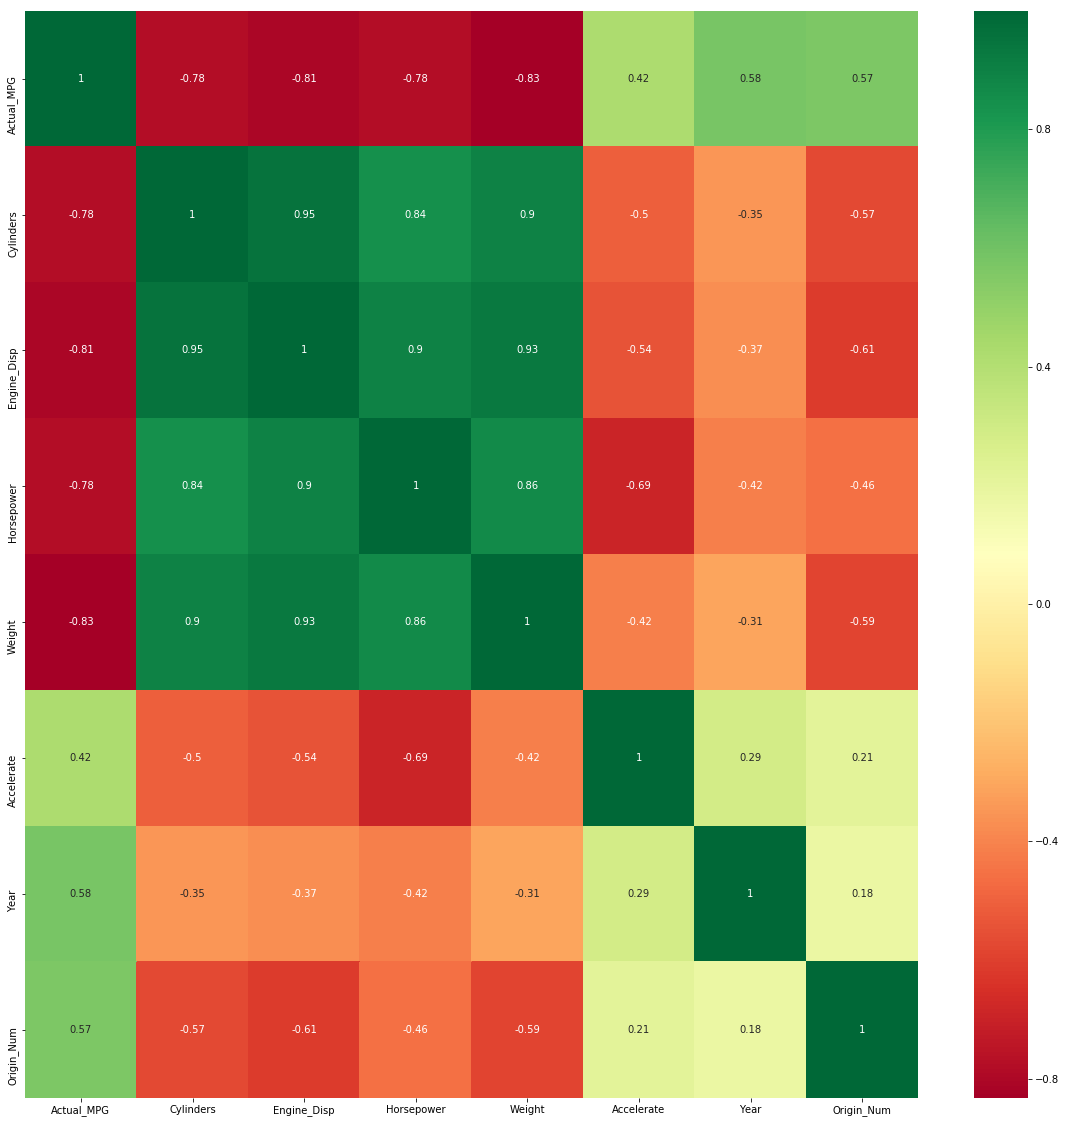

In [118]:
plt.subplots(figsize=(20,20))
sns.heatmap(x, cmap = 'RdYlGn', annot = True)
plt.show()

In [119]:
# create features and lanbels for the normalized data
x = cars_df.loc[:,['Cylinders', 'Engine_Disp', 'Horsepower', 'Weight', 'Accelerate', 'Year', 'Origin_Num']]
y = cars_df['Actual_MPG']
x.head()
y.head()

,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin_Num
0,8,390.0,190,3850,8.5,70,1
1,6,199.0,90,2648,15.0,70,1
2,6,199.0,97,2774,15.5,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,455.0,225,3086,10.0,70,1


0    15.0
1    21.0
2    18.0
3    16.0
4    14.0
Name: Actual_MPG, dtype: float64

In [120]:
#Create train, test data with 75% and 25% split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.40, random_state = 1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(235, 7)

(157, 7)

(235,)

(157,)

In [121]:
# Let's import the regression object and define model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
# Fit a model on the train data
lm.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
# Evaluate the model
predict_test = lm.predict(test_x)

In [124]:
#R2 Value
print("RSquare value for TEST data is - ")
np.round(lm.score(test_x, test_y)*100, 0)
print("RSquare value for TRAIN data is - ")
np.round(lm.score(train_x, train_y)*100, 0)

RSquare value for TEST data is - 


84.0

RSquare value for TRAIN data is - 


80.0

In [125]:
# Predict on test and training data
predict_test = lm.predict(test_x)

In [126]:
# Print the loss function  - MSE
import numpy as np
from sklearn import metrics
print("Mean Squaere Error(MSE) for Test Data is ")
np.round(metrics.mean_squared_error(test_y, predict_test), 0)

Mean Squaere Error(MSE) for Test Data is 


10.0

In [127]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error  (MAE) for Test Data is ")
np.round(mean_absolute_error(test_y, predict_test), 0)

Mean Absolute Error  (MAE) for Test Data is 


2.0

In [128]:
#Append Data
fdf = pd.concat([test_x, test_y], 1)
fdf['Predicted'] = np.round(predict_test, 1)
fdf['Predicted_Error'] = fdf['Actual_MPG'] - fdf['Predicted']
fdf

,Cylinders,Engine_Disp,Horsepower,Weight,Accelerate,Year,Origin_Num,Actual_MPG,Predicted,Predicted_Error
81,4,97.0,88,2100,16.5,72,3,27.0,27.8,-0.8
165,6,225.0,95,3785,19.0,75,1,18.0,17.3,0.7
351,4,85.0,65,1975,19.4,81,3,37.0,35.4,1.6
119,4,121.0,112,2868,15.5,73,2,19.0,21.7,-2.7
379,4,112.0,85,2575,16.2,82,1,31.0,29.3,1.7
236,6,146.0,97,2815,14.5,77,3,22.0,26.3,-4.3
78,4,121.0,112,2933,14.5,72,2,18.0,20.5,-2.5
92,8,350.0,145,3988,13.0,73,1,13.0,15.2,-2.2
80,3,70.0,97,2330,13.5,72,3,19.0,25.7,-6.7
333,4,134.0,90,2711,15.5,80,3,29.8,30.0,-0.2


(<matplotlib.figure.Figure at 0x1f9b6aa46a0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f9b69ff1d0>)

Text(0.5,0,'Actual_MPG')

Text(0,0.5,'Error')

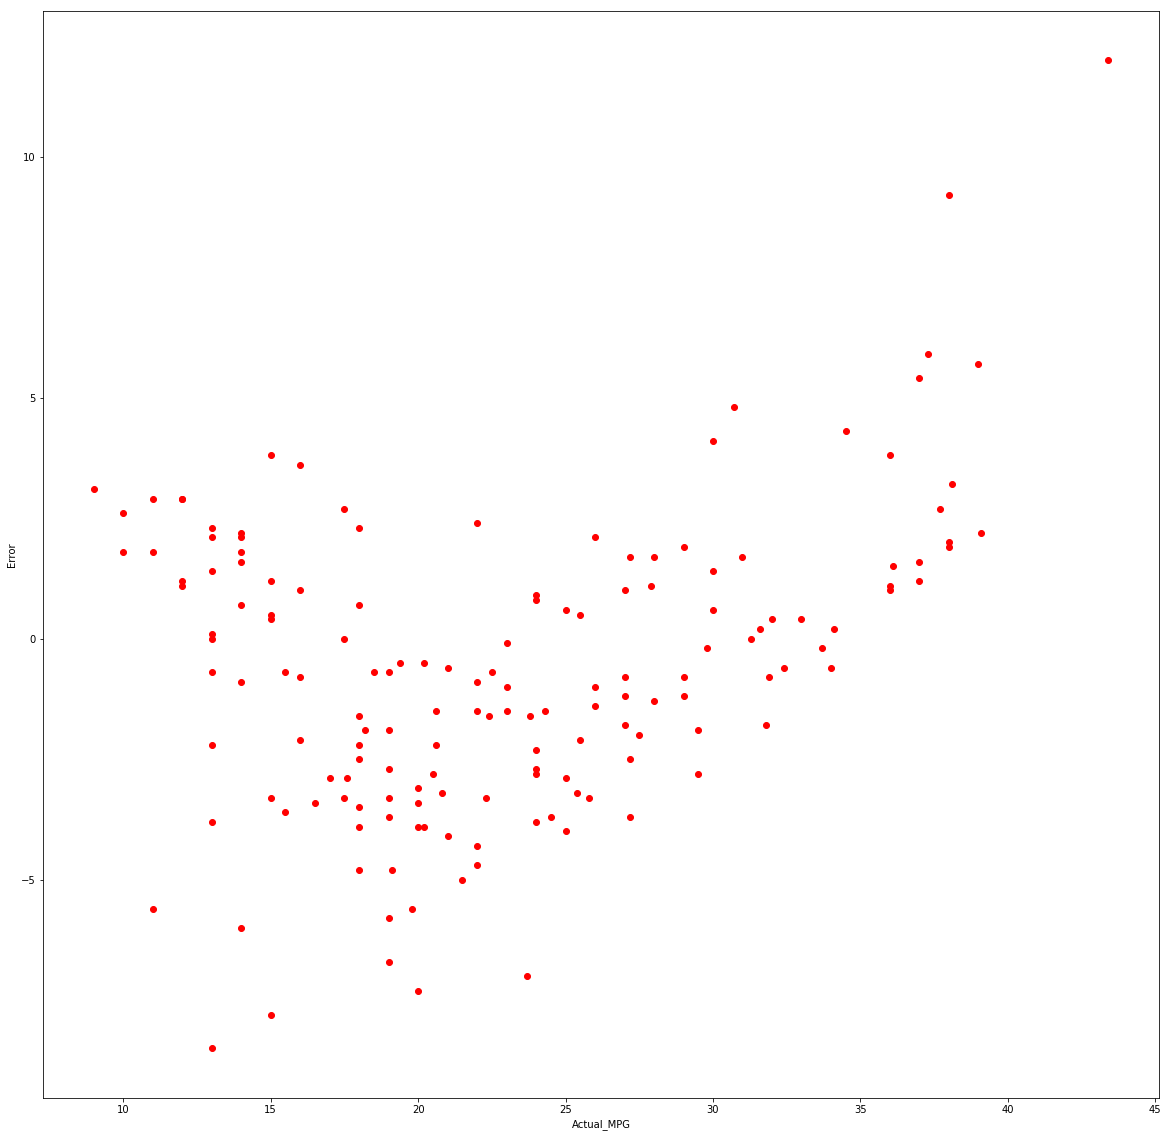

In [129]:
plt.subplots(figsize = (20,20))
plt.scatter(fdf.Actual_MPG, fdf.Predicted_Error, color = 'red')
plt.xlabel ('Actual_MPG')
plt.ylabel ('Error')
plt.show()

<function matplotlib.pyplot.show>

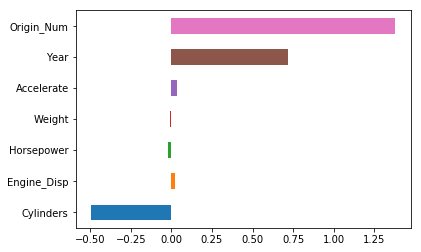

In [130]:
# FEATURE SELECTION - IMPORTANCE
ft_importances = pd.Series(lm.coef_,index=x.columns)
ft_importances.plot(kind='barh')
plt.show